In [ ]:
# Calculate the Limb Darkenning Coefficients using 2017 model
#-------------------------------------------------------------------------------
#     Label Format Unit   Explanations
#-------------------------------------------------------------------------------
#      logg F5.2   cm/s+2 [2.5/6.0] Surface gravity
#      Teff F6.0   K      [1500/12000] Effective temperature
#         Z F4.1   [-]    [0] Metallicity (log[M/H])
#      L/HP F4.1   ---    [2] Mixing-length parameter
#         a F8.4   ---    Eq.2 spherical linear limb darkening coefficient
#                          a (FSM) (2)
#         b F8.4   ---    Eq.2 spherical linear limb darkening coefficient
#                          b (FSM) (2)
#        mu F8.4   ---    MU_CRI_ parameter (FSM)
#      chi2 F8.4   ---    SQRT(CHI2Q) (FSM)
#       Mod A2     ---    [PD PC] Model name (G1)
#       Sys A6     ---    System (TESS, KEPLER, COROT or MOST)
#-------------------------------------------------------------------------------
#Note (2): Eq. 2 : Quadratic law    I({mu})/I(1) = 1-a(1-{mu})-b(1-{mu})^2^
#-------------------------------------------------------------------------------



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy import interpolate

In [3]:
table16 = np.genfromtxt('Data_Files/table16.dat',dtype=np.double)
# table5 = np.genfromtxt('Data_Files/table5.dat',dtype=np.double) # Another model (2018)

logg = table16[:,0]
teff = table16[:,1]
lfeh = table16[:,2]
ld_c1 = table16[:,4]
ld_c2 = table16[:,5]

print(len(logg))

574


In [4]:
# We can use scipy.interpolate.interp2d to do a bilinear interpolation 

c1_function = interpolate.interp2d(logg, teff, ld_c1, kind='linear')
c2_function = interpolate.interp2d(logg, teff, ld_c2, kind='linear')

ii = 295
teff_in = teff[ii]
logg_in = logg[ii]
c1_in = ld_c1[ii]
c2_in = ld_c2[ii]

c1_out = c1_function(logg_in, teff_in)[0]
c2_out = c2_function(logg_in, teff_in)[0]
print('input: logg={0:f}, teff={1:f}, c1: in={2:f} out={3:f} c2: in={4:f} out={5:f}'.format(logg_in, teff_in, c1_in, c1_out, c2_in, c2_out))

teff_in = teff[ii+8]
logg_in = logg[ii+8]
c1_in = ld_c1[ii+8]
c2_in = ld_c2[ii+8]

c1_out = c1_function(logg_in, teff_in)[0]
c2_out = c2_function(logg_in, teff_in)[0]
print('input: logg={0:f}, teff={1:f}, c1: in={2:f} out={3:f} c2: in={4:f} out={5:f}'.format(logg_in, teff_in, c1_in, c1_out, c2_in, c2_out))

input: logg=3.000000, teff=6100.000000, c1: in=0.337300 out=0.337177 c2: in=0.226900 out=0.227375
input: logg=3.000000, teff=6200.000000, c1: in=0.330600 out=0.330363 c2: in=0.228500 out=0.227645


C:\Users\Mohamed Ismaiel\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=17,41 m=574 fp=0.001535 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\Mohamed Ismaiel\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=17,42 m=574 fp=0.001782 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [5]:
logg_array = logg[teff==4000]
print('logg coordinates (array): ',logg_array)
teff_array = teff[logg==4.0]
print('Teff coordinates (array): ',teff_array)

logg coordinates (array):  [2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
Teff coordinates (array):  [ 2300.  2400.  2500.  2600.  2700.  2800.  2900.  3000.  3100.  3200.
  3300.  3400.  3500.  3600.  3700.  3800.  3900.  4000.  4100.  4200.
  4300.  4400.  4500.  4600.  4700.  4800.  4900.  5100.  5200.  5300.
  5400.  5500.  5600.  5700.  5800.  5900.  6000.  6100.  6200.  6300.
  6400.  6500.  6600.  6700.  6800.  6900.  7000.  7200.  7400.  7600.
  7800.  8000.  8200.  8400.  8600.  8800.  9000.  9200.  9400.  9600.
  9800. 10000. 10200. 10400. 10600. 10800. 11000. 11200. 11400. 11600.
 11800. 12000.]


In [6]:
# we create a 2D grid with size (len(logg_array) x len(teff_array))
# for each LD coefficient

c1_matrix = np.zeros((len(logg_array), len(teff_array)))
c2_matrix = np.zeros((len(logg_array), len(teff_array)))
print('Matrix shape: ',np.shape(c1_matrix))

Matrix shape:  (8, 72)


In [7]:
# Fill the matrix 
# this is a brain-less cycle, must likely there is a more efficient way to do this!

# The enumerate() method adds counter to an iterable and returns it (the enumerate object).
for logg_i, logg_v in enumerate(logg_array):
    print('counter:', logg_i, '   value: ', logg_v)

counter: 0    value:  2.5
counter: 1    value:  3.0
counter: 2    value:  3.5
counter: 3    value:  4.0
counter: 4    value:  4.5
counter: 5    value:  5.0
counter: 6    value:  5.5
counter: 7    value:  6.0


In [8]:
for logg_i, logg_v in enumerate(logg_array):
    for teff_i, teff_v in enumerate(teff_array):
        # identify the row corresponding to a given combination of gravity and tempearture 
        sel = (logg == logg_v) & (teff == teff_v)
        
        if np.sum(sel) == 1:
            c1_matrix[logg_i, teff_i] = ld_c1[sel]
            c2_matrix[logg_i, teff_i] = ld_c2[sel]
        else:
            print('No value for (logg,teff)=({0:f},{1:f})'.format(logg_v,teff_v))
            c1_matrix[logg_i, teff_i] = (c1_matrix[logg_i, teff_i-1] + c1_matrix[logg_i, teff_i+1])/2
            c2_matrix[logg_i, teff_i] = (c2_matrix[logg_i, teff_i-1] + c2_matrix[logg_i, teff_i+1])/2
            # replacing this combination with average values

No value for (logg,teff)=(5.000000,3000.000000)
No value for (logg,teff)=(6.000000,2800.000000)


<IPython.core.display.Javascript object>


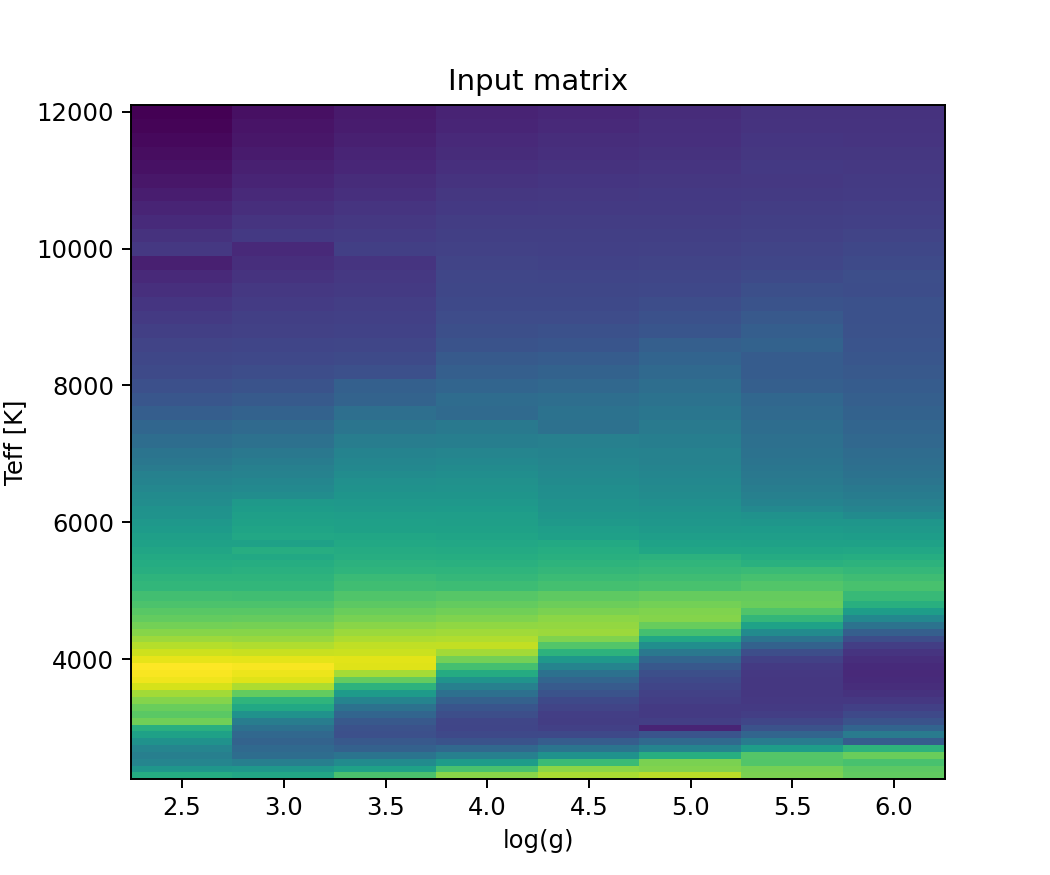

In [9]:
# The new real matrix
xx, yy = np.meshgrid(logg_array,teff_array)
plt.figure(figsize=(6,5))
plt.pcolor(xx, yy, c1_matrix.T, shading='auto')
plt.title('Input matrix')
plt.xlabel('log(g)')
plt.ylabel('Teff [K]')
plt.show()

In [10]:
c1_function = interpolate.interp2d(logg_array, teff_array, c1_matrix.T, kind='linear')
c2_function = interpolate.interp2d(logg_array, teff_array, c2_matrix.T, kind='linear')

ii = 295
teff_in = teff[ii]
logg_in = logg[ii]
c1_in = ld_c1[ii]
c2_in = ld_c2[ii]

c1_out = c1_function(logg_in, teff_in)[0]
c2_out = c2_function(logg_in, teff_in)[0]
print('input: logg={0:f}, teff={1:f}, c1: in={2:f} out={3:f} c2: in={4:f} out={5:f}'.format(logg_in, teff_in, c1_in, c1_out, c2_in, c2_out))

teff_in = teff[ii+8]
logg_in = logg[ii+8]
c1_in = ld_c1[ii+8]
c2_in = ld_c2[ii+8]

c1_out = c1_function(logg_in, teff_in)[0]
c2_out = c2_function(logg_in, teff_in)[0]
print('input: logg={0:f}, teff={1:f}, c1: in={2:f} out={3:f} c2: in={4:f} out={5:f}'.format(logg_in, teff_in, c1_in, c1_out, c2_in, c2_out))

input: logg=3.000000, teff=6100.000000, c1: in=0.337300 out=0.337300 c2: in=0.226900 out=0.226900
input: logg=3.000000, teff=6200.000000, c1: in=0.330600 out=0.330600 c2: in=0.228500 out=0.228500


In [11]:
teff_in = teff[ii] + 20
logg_in = logg[ii] + 0.4
c1_in = ld_c1[ii]
c2_in = ld_c2[ii]

c1_out = c1_function(logg_in, teff_in)[0]
c2_out = c2_function(logg_in, teff_in)[0]
print('input: logg={0:f}, teff={1:f}, c1: in={2:f} out={3:f} c2: in={4:f} out={5:f}'.format(logg_in, teff_in, c1_in, c1_out, c2_in, c2_out))
# look at the output value!!

input: logg=3.400000, teff=6120.000000, c1: in=0.337300 out=0.333656 c2: in=0.226900 out=0.229828


<IPython.core.display.Javascript object>


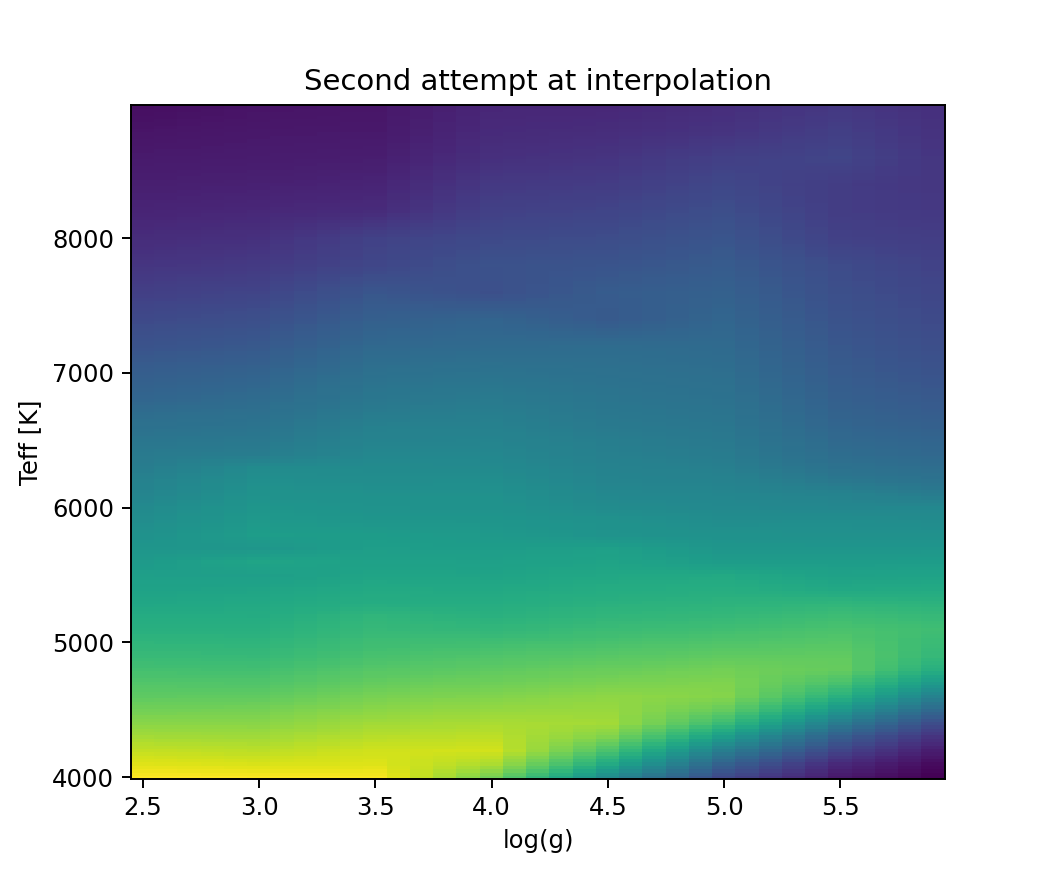

In [12]:
teff_grid = np.arange(4000, 9000, 25)
logg_grid = np.arange(2.5, 6.0, 0.1)

xx, yy = np.meshgrid(logg_grid,teff_grid)
c1_plot_out = c1_function(logg_grid, teff_grid)

plt.figure(figsize=(6,5))
plt.pcolor(xx,yy, c1_plot_out, shading='auto')
plt.title('Second attempt at interpolation')
plt.xlabel('log(g)')
plt.ylabel('Teff [K]')
plt.show()

<IPython.core.display.Javascript object>


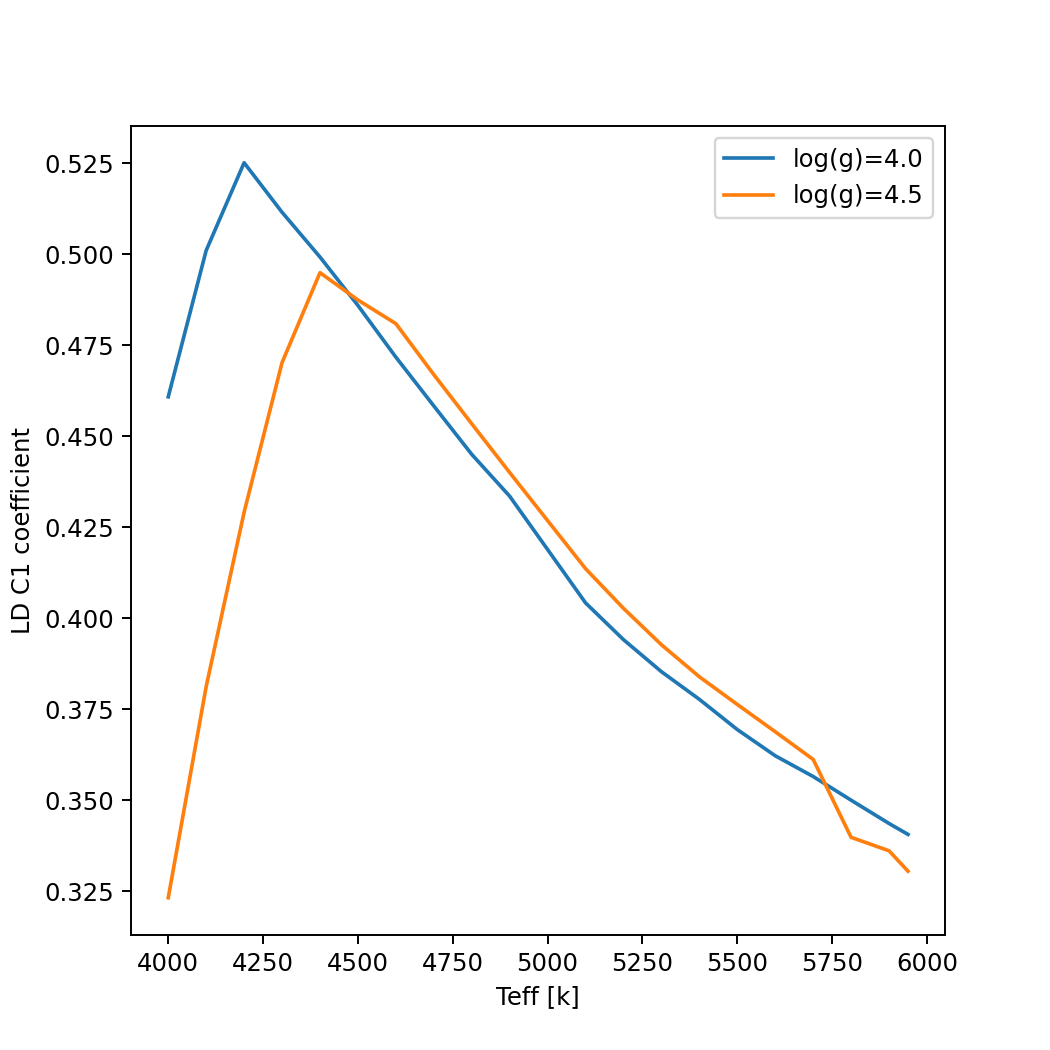

In [13]:
teff_curve = np.arange(4000,6000,50)
c1_logg40 = c1_function(4.0, teff_curve)
c1_logg45 = c1_function(4.5, teff_curve)
c1_logg50 = c1_function(5.0, teff_curve)

plt.figure(figsize=(6,6))
plt.plot(teff_curve, c1_logg40, label='log(g)=4.0')
plt.plot(teff_curve, c1_logg45, label='log(g)=4.5')
#plt.plot(teff_curve, c1_logg50, label='log(g)=5.0')
plt.ylabel('LD C1 coefficient')
plt.xlabel('Teff [k]')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


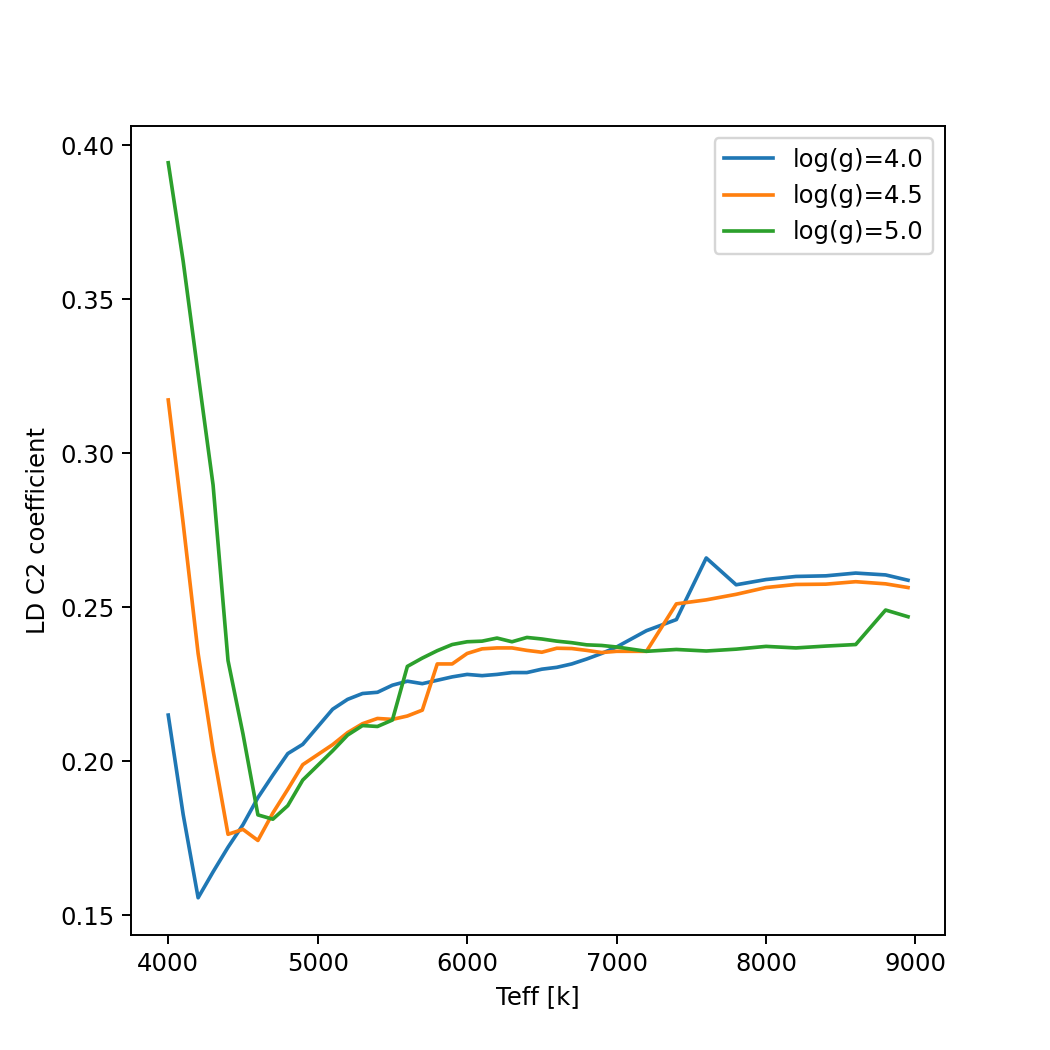

In [14]:
teff_curve = np.arange(4000,9000,50)
c2_logg40 = c2_function(4.0, teff_curve)
c2_logg45 = c2_function(4.5, teff_curve)
c2_logg50 = c2_function(5.0, teff_curve)

plt.figure(figsize=(6,6))
plt.plot(teff_curve, c2_logg40, label='log(g)=4.0')
plt.plot(teff_curve, c2_logg45, label='log(g)=4.5')
plt.plot(teff_curve, c2_logg50, label='log(g)=5.0')
plt.ylabel('LD C2 coefficient')
plt.xlabel('Teff [k]')
plt.legend()
plt.show()

In [15]:
#let's consider the atmoshperic parameters for our target:

star_teff = [5340., 200.]
star_logg = [4.418, 0.100] 

#star_teff = [5100., 200.]
#star_logg = [4.5, 0.1000] 


In [17]:
c1_star = c1_function(logg_in, teff_in)
print(c1_star)

[0.333656]


In [18]:
teff_in = star_teff[0]
logg_in = star_logg[0]
c1_star = c1_function(logg_in, teff_in)[0]
c2_star = c2_function(logg_in, teff_in)[0]
print('input: logg={0:f}, teff={1:f}, c1={2:f} c2={3:f}'.format(logg_in, teff_in, c1_star, c2_star))

input: logg=4.418000, teff=5340.000000, c1=0.388045 c2=0.214402


In [19]:
# We use a Monte Carlo approach to determine the influence of the errors in Teff and log(g) on c1 and c2 
n_sample = 1000 # LD output wil have 1000^2 elements  
teff_dist = np.random.normal(star_teff[0], star_teff[1], n_sample)
logg_dist = np.random.normal(star_logg[0], star_logg[1], n_sample)


In [20]:

c1_function([4.000, 5.000], [8000., 10000., 12000])

array([[0.209 , 0.2276],
       [0.1381, 0.1375],
       [0.0853, 0.0996]])

In [21]:
print(c1_function(4.000, 8000.), c1_function(5.000, 8000.))
print(c1_function(4.000, 10000.), c1_function(5.000, 10000.))
print(c1_function(4.000, 12000.), c1_function(5.000, 12000.))

c1_test = c1_function([4.000, 5.000], [8000., 10000., 12000.])
print('C1 with same temperature values ', c1_test[0,:]) # first row: logg_array & first element of temperature array
print('C1 with same log(g) values      ', c1_test[:,0]) # first columns: teff_array & first element of logg array

[0.209] [0.2276]
[0.1381] [0.1375]
[0.0853] [0.0996]
C1 with same temperature values  [0.209  0.2276]
C1 with same log(g) values       [0.209  0.1381 0.0853]


In [ ]:
# A side effect of this outcome is that all the first n samples from random logg will have the same value for Teff. 
# The LD C1 coefficient is very sensitive to temperature - so if the error on Teff is very large and we don't create enough samples, 
# we will have many "localized" distributions 

In [22]:
c1_dist = c1_function(logg_dist, teff_dist)
plt.figure(figsize=(8,6))

for ii in range(0, 5):
    print('Teff value: ', teff_dist[ii])
    plt.hist(c1_dist[ii,:], 30, density=True, alpha=0.1)

plt.show()

<IPython.core.display.Javascript object>

Teff value:  5018.3299008103
Teff value:  5484.937313527833
Teff value:  5640.260556426013
Teff value:  5387.921193993108
Teff value:  5085.694146549931


In [23]:
# Let'r try again with a lot more of samples
n_sample = 1000000  # start small (1000) and increase the number while execution time is still acceptable
teff_dist = np.random.normal(star_teff[0], star_teff[1], n_sample)
logg_dist = np.random.normal(star_logg[0], star_logg[1], n_sample)

# let's do it the slow - but safe - way
c1_dist = np.zeros(n_sample)
c2_dist = np.zeros(n_sample)
for ii in range(0, n_sample):
    c1_dist[ii] = c1_function(logg_dist[ii], teff_dist[ii])
    c2_dist[ii] = c2_function(logg_dist[ii], teff_dist[ii])
    

In [24]:
print('number of samples:',len(c1_dist),'  shape of the array:', c1_dist.shape)

print()
c1_average = np.average(c1_dist) # average
c1_median = np.median(c1_dist)   # median
c1_std = np.std(c1_dist)         # standard deviation
c1_minus1sigma_perc = np.percentile(c1_dist, 15.865)
c1_plus1sigma_perc = np.percentile(c1_dist, 84.135)

print('C1   nominal    : {0:0.4f}\n'
      '     average    : {1:0.4f}\n'
      '     median     : {2:5.4f}\n'
      '     std        : {3:5.4f}\n'
      '     15.865 perc: {4:5.4f}\n'
      '     84.135 perc: {5:5.4f}\n'.format(c1_star, 
                                            c1_average, 
                                            c1_median, 
                                            c1_std, 
                                            c1_minus1sigma_perc, 
                                            c1_plus1sigma_perc)
     )

plt.figure(figsize=(8,6))
count, bins, _ = plt.hist(c1_dist, 50, density=True, label='True distribution', alpha=0.5)

x_gauss = np.linspace(bins[0], bins[-1], 1000)
y_gauss = 1/( c1_std * np.sqrt(2 * np.pi)) * np.exp( - (x_gauss - c1_star)**2 / (2 *  c1_std**2) )
plt.plot(x_gauss, y_gauss, linewidth=2, label='Gaussian PDF',  color='r')

plt.axvline(c1_star,    c='C3', label = 'Nominal')
plt.axvline(c1_average, c='C1', label = 'Average')
plt.axvline(c1_median,  c='C2', label='Median')
plt.axvline(c1_minus1sigma_perc,  c='C4', label='15.865 perc')
plt.axvline(c1_plus1sigma_perc ,  c='C5', label='84.135 perc')
plt.axvline(c1_median-c1_std,  c='C6', label='Median +- STD')
plt.axvline(c1_median+c1_std,  c='C6')

plt.xlabel('C1 coefficient')
plt.ylabel('# samples')
plt.legend()
plt.show()



number of samples: 1000000   shape of the array: (1000000,)

C1   nominal    : 0.3880
     average    : 0.3895
     median     : 0.3879
     std        : 0.0193
     15.865 perc: 0.3718
     84.135 perc: 0.4077



<IPython.core.display.Javascript object>

number of samples: 1000000   shape of the array: (1000000,)

C2   nominal    : 0.2144
     average    : 0.2133
     median     : 0.2140
     std        : 0.0053
     15.865 perc: 0.2088
     84.135 perc: 0.2171



<IPython.core.display.Javascript object>


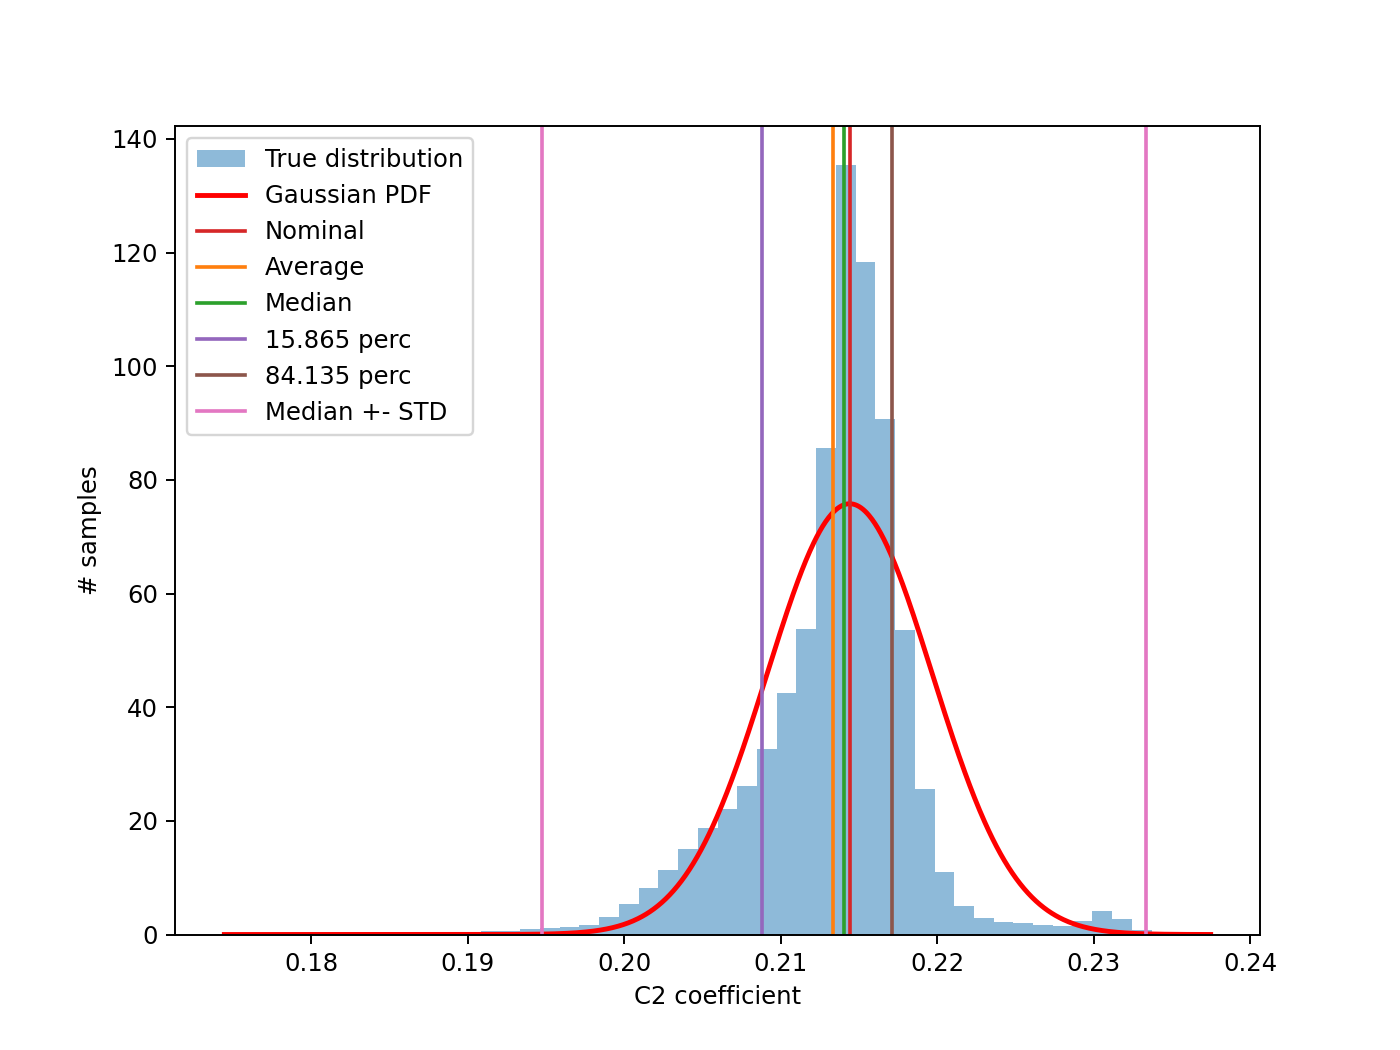

In [25]:
from scipy.stats import skewnorm  

print('number of samples:',len(c2_dist),'  shape of the array:', c2_dist.shape)

print()
c2_average = np.average(c2_dist) # average
c2_median = np.median(c2_dist)   # median
c2_std = np.std(c2_dist)         # standard deviation
c2_minus1sigma_perc = np.percentile(c2_dist, 15.865)
c2_plus1sigma_perc = np.percentile(c2_dist, 84.135)

print('C2   nominal    : {0:0.4f}\n'
      '     average    : {1:0.4f}\n'
      '     median     : {2:5.4f}\n'
      '     std        : {3:5.4f}\n'
      '     15.865 perc: {4:5.4f}\n'
      '     84.135 perc: {5:5.4f}\n'.format(c2_star, 
                                            c2_average, 
                                            c2_median, 
                                            c2_std, 
                                            c2_minus1sigma_perc, 
                                            c2_plus1sigma_perc)
     )

# plt.hist will make an histogram, but it only accepts 1D arrays
# third output is something we don't need, so we use _
plt.figure(figsize=(8,6))
count, bins, _ = plt.hist(c2_dist, 50, density=True, label='True distribution', alpha=0.5)

x_gauss = np.linspace(bins[0], bins[-1], 1000)
y_gauss = 1/( c2_std * np.sqrt(2 * np.pi)) * np.exp( - (x_gauss - c2_star)**2 / (2 *  c2_std**2) )
plt.plot(x_gauss, y_gauss, linewidth=2, label='Gaussian PDF',  color='r')

plt.axvline(c2_star,    c='C3', label = 'Nominal')
plt.axvline(c2_average, c='C1', label = 'Average')
plt.axvline(c2_median,  c='C2', label='Median')
plt.axvline(c2_minus1sigma_perc,  c='C4', label='15.865 perc')
plt.axvline(c2_plus1sigma_perc ,  c='C5', label='84.135 perc')
plt.axvline(c2_median-c1_std,  c='C6', label='Median +- STD')
plt.axvline(c2_median+c1_std,  c='C6')

plt.xlabel('C2 coefficient')
plt.ylabel('# samples')
plt.legend()
plt.show()



     median     : 0.2435
     std        : 0.0073
     15.865 perc: 0.2377
     84.135 perc: 0.2524
     
     -1 sigma : 0.2435-0.2377=0.006
     +1 sigma : 0.2524-0.2435=0.009
     
     We took the xx percentiles as an estimate of the confidence interval
     $0.2435_{-0.006}^{+0.009}$ 

    In the code:
        -> Try the fit without any prior on limb darkening 
        -> Compare the results with your estimate distribution
        
        -> Are they consistent? If consistent: try the fit with the priors 
            -> provide the actual file the all the samples values 
            -> or provide a Gaussian prior with conservative estimate of the variance 
                Gaussian 0.244 STD: 0.009 
            Is the precision of the planetary radius improved? 
           
           
            
